# Medium Dataset Experiments

In [71]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath("../.."))

from src.utils import plot_graph, plot_colored_graph, loading_graphs

from src.algorithm import run_genetic_algorithm
from src.genetic_operators import ( tournament_selection, roulette_wheel_selection
                                , one_point_crossover, uniform_crossover
                                , single_gene_mutation, independent_gene_mutation)

Medium Graph Loaded
Nodes: 81
Edges: 1056


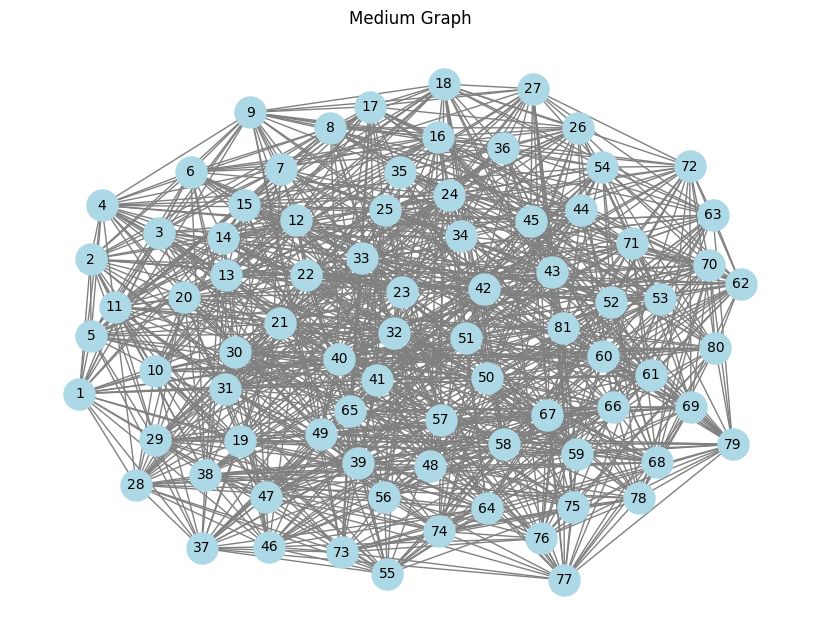

In [72]:
dataset = "../../data/queen9_9.col.txt"
graph = loading_graphs(dataset, size="Medium")
num_nodes = graph.number_of_nodes()

plot_graph(graph, title="Medium Graph")

In [73]:
POP_SIZE = 400
MAX_GEN = 1000
MAX_COLORS = 14
ELITISM = 5
STATIONAY_LIMIT = 300
MUTATION_RATE = 0.05

# Experiments (Name, Selection, Crossover, Mutation)
experiments = [
    {
        "Experiment": "Experiment 1",
        "Selection": tournament_selection,
        "Crossover": one_point_crossover,
        "Mutation": single_gene_mutation,
        "Mutation Rate": None
    },
    {
         "Experiment": "Experiment 2",
         "Selection": tournament_selection,
         "Crossover": one_point_crossover,
         "Mutation": independent_gene_mutation,
         "Mutation Rate": MUTATION_RATE
    },
    {
        "Experiment": "Experiment 3",
        "Selection": tournament_selection,
        "Crossover": uniform_crossover,
        "Mutation": single_gene_mutation,
        "Mutation Rate": None
    },
    {
        "Experiment": "Experiment 4",
        "Selection": tournament_selection,
        "Crossover": uniform_crossover,
        "Mutation": independent_gene_mutation,
        "Mutation Rate": MUTATION_RATE
    },
    {
        "Experiment": "Experiment 5",
        "Selection": roulette_wheel_selection,
        "Crossover": one_point_crossover,
        "Mutation": single_gene_mutation,
        "Mutation Rate": None
    },
    {
        "Experiment": "Experiment 6",
        "Selection": roulette_wheel_selection,
        "Crossover": uniform_crossover,
        "Mutation": independent_gene_mutation,
        "Mutation Rate": MUTATION_RATE
    }
]

In [74]:
results_table = []
best_overall = None
best_history = None

print(f"Running Experiments for {dataset}\n")

for exp in experiments:
    print(f"Running {exp["Experiment"]}...")

    best_ind, history = run_genetic_algorithm(
        graph=graph,
        pop_size=POP_SIZE,
        max_generations=MAX_GEN,
        max_colors=MAX_COLORS,
        selection_func=exp["Selection"],
        crossover_func=exp["Crossover"],
        mutation_func=exp["Mutation"],
        mutation_rate=exp["Mutation Rate"],
        elitism_count=ELITISM,
        stationary_limit=STATIONAY_LIMIT
    )

    # Store Results
    results_table.append({
        "Experiment": exp["Experiment"],
        "Selection": exp["Selection"].__name__,
        "Crossover": exp["Crossover"].__name__,
        "Mutation": exp["Mutation"].__name__,
        "Best Fitness": best_ind.fitness,
        "Conflicts": best_ind.conflicts,
        "Colors Used": len(set(best_ind.genes))
    })

    # Store Best Overall Individual
    if best_overall is None or best_ind.fitness < best_overall.fitness:
        best_overall = best_ind
        best_history = history

Running Experiments for ../../data/queen9_9.col.txt

Running Experiment 1...
Stationary state reached at generation 580.
Running Experiment 2...
Stationary state reached at generation 355.
Running Experiment 3...
Stationary state reached at generation 402.
Running Experiment 4...
Stationary state reached at generation 393.
Running Experiment 5...
Stationary state reached at generation 605.
Running Experiment 6...



Results Table
  Experiment                Selection           Crossover                  Mutation  Best Fitness  Conflicts  Colors Used
Experiment 1     tournament_selection one_point_crossover      single_gene_mutation            13          0           13
Experiment 2     tournament_selection one_point_crossover independent_gene_mutation            14          0           14
Experiment 3     tournament_selection   uniform_crossover      single_gene_mutation            14          0           14
Experiment 4     tournament_selection   uniform_crossover independent_gene_mutation            14          0           14
Experiment 5 roulette_wheel_selection one_point_crossover      single_gene_mutation            13          0           13
Experiment 6 roulette_wheel_selection   uniform_crossover independent_gene_mutation            14          0           14


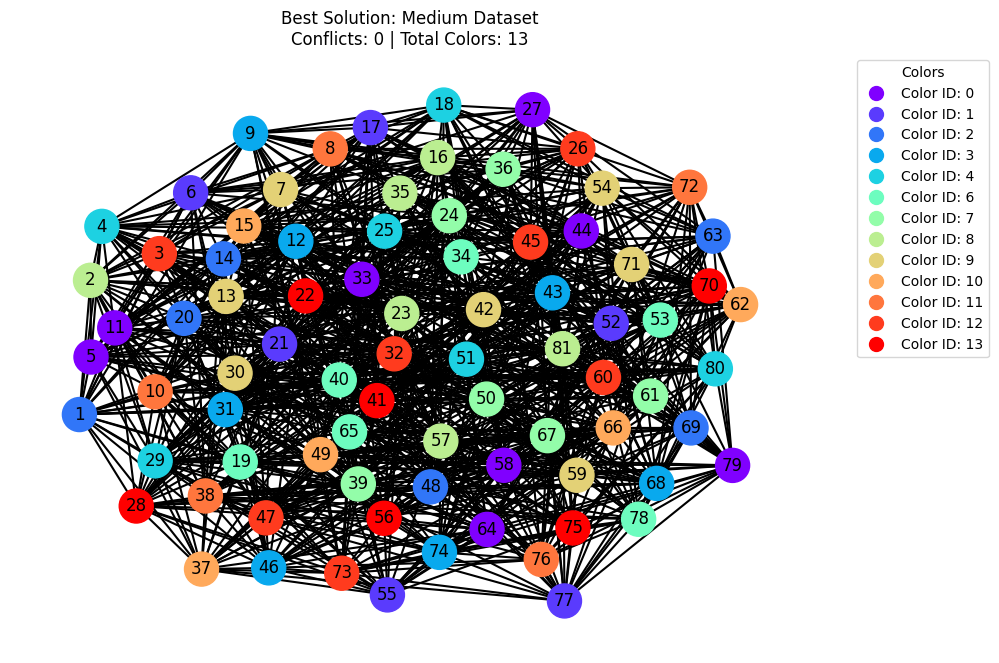

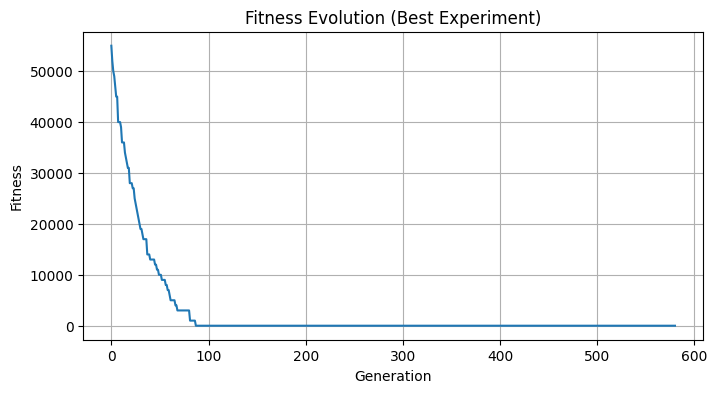

In [75]:
df = pd.DataFrame(results_table)
print("\nResults Table")
print(df.to_string(index=False))

if best_overall is not None:
    plot_colored_graph(graph, best_overall, title=f"Best Solution: Medium Dataset")

    plt.figure(figsize=(8, 4))
    plt.plot(best_history)
    plt.title("Fitness Evolution (Best Experiment)")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.grid(True)
    plt.show()